**Eithar Elfatih Burie Abdelrahaman** - DS2403

In [4]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

__Medical Cost Personal Insurance__
__Project Description__
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated.

    Columns                                            
    •	age: age of primary beneficiary
    •	sex: insurance contractor gender, female, male
    •	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
    •	children: Number of children covered by health insurance / Number of dependents
    •	smoker: Smoking
    •	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    •	charges: Individual medical costs billed by health insurance


# Explore

In [21]:
#Import data from given url 
med_data_url=('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')


#show data 
med_cost=pd.read_csv(med_data_url)
med_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
#show head
med_cost.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [23]:
#show tail
med_cost.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [24]:
# show columns
med_cost.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
#show dimension
med_cost.shape

(1338, 7)

In [26]:
#show info
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
#Check for null values
med_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
#Check for null values
med_cost.isnull().sum().sum()

0

__

__comment__: no null values, however dtypes are 'int64, object, float 64'... object must be converted to numerical format for further analysis

# objective - to predict insurance costs

In [29]:
#statistics summary 
med_cost.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


from the above table, we can see the following:
    
    .the mean and median are very similar (charges has the biggest difference)
    .the average BMI in this data set is 30 (30 and above is considered obese so we can concluded that the majority of indivuals are obese)
    .the difference between 25% and 75% are large (which suggests outliers)
    
    bmi facts:
    <18.5 = underweight
    18.5 =< 24.9 =healthy weight 
    25 =< 29.9 = overweight 
    > 30 = obese

In [30]:
# show bmi count above 30
bmi=med_cost['bmi']>=30
bmi.value_counts()

True     707
False    631
Name: bmi, dtype: int64

__comment:__ >30 count is True for 707 individuals (over half)

In [38]:
#clean data and convert to numerical 
med_clean= {'sex':{'male':0, 'female':1},
                'smoker': {'no':0, 'yes': 1},
                'region': {'northwest':0, 'northeast':1, 'sounteast': 2, 'southwest':3}
                }

med_cost_new=med_cost.copy()
med_cost_new.replace(med_clean, inplace=True)

In [41]:
#show info
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
#convert object to float 
#med_cost['sex']=med_cost.astype(float)
#med_cost['sex'].dtype


ValueError: could not convert string to float: 'female'

In [40]:
med_cost_new.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


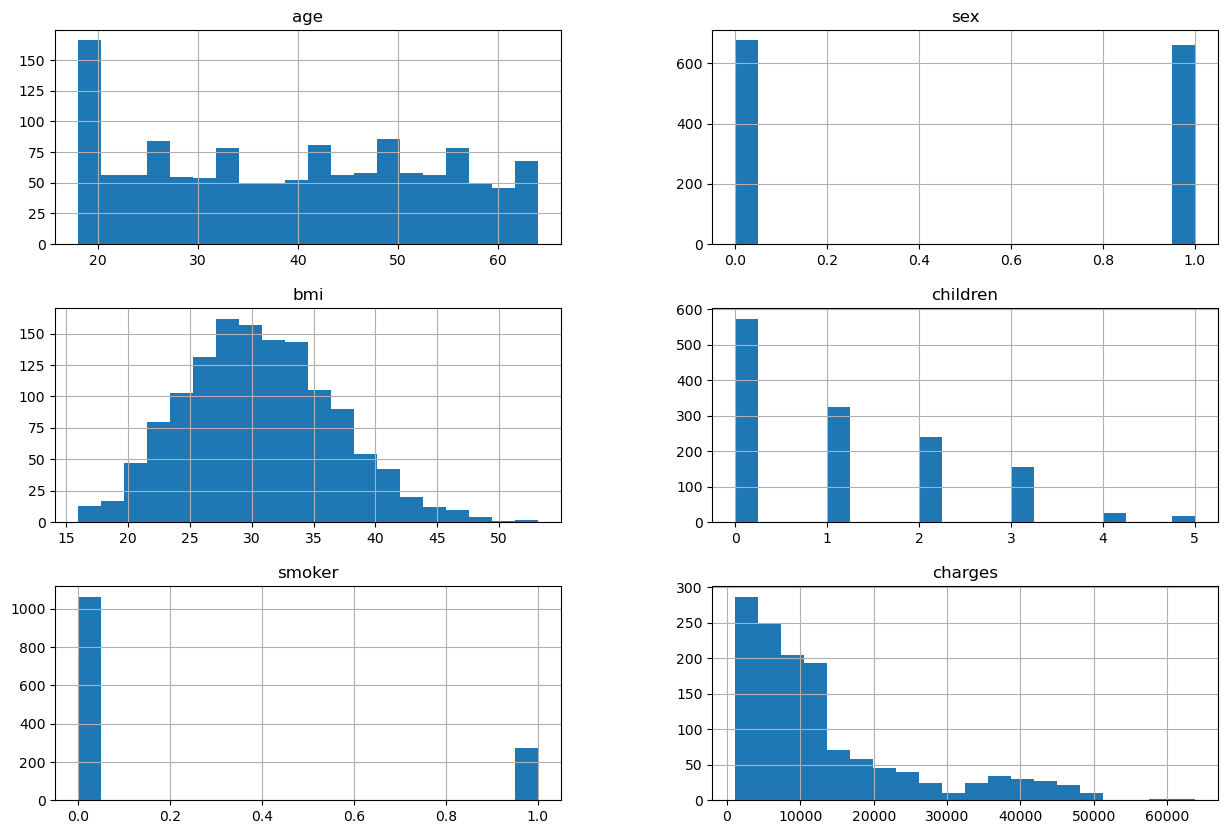

In [48]:
#histogram of each attribute 
med_cost_new.hist(bins=20, figsize=(15,10))

plt.show()

from the above we can see:
    .age seems steadily distributed across all ages, except under 21 is much higher.
    (this could be due to indivuals being dependents)
    
    .sex is more orless evenly is uniformly ditributed
    (therefore very fair in terms of gender)
    
    .bmi is normally distributed
    ( however, the average as mentioned before is obese)
    
    .children is right skewed
    (suggest the more children some has the less likely to get health insurance)
    
    .smokers to non smokers is very imbalance 
    (smokers are more inclined to get health insurance)
    
    .charges is right skewed
    (the higher the charge the less individuals are willing/able to pay)

ValueError: could not convert string to float: 'southeast'

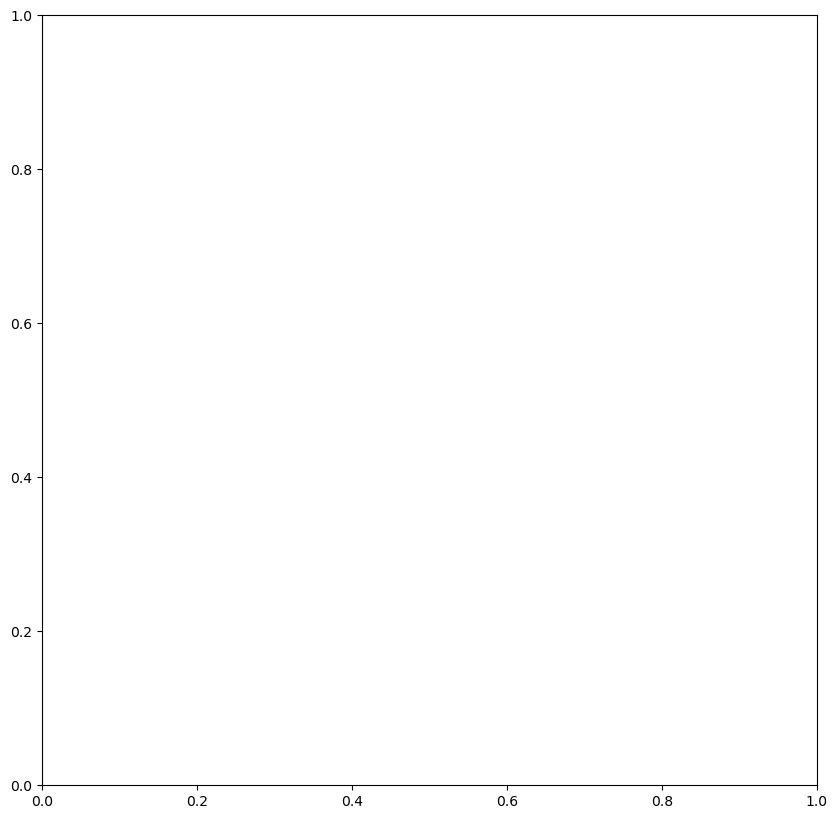

In [60]:
#heatmap of each attribute 
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(med_cost_new, cmap='YlGbu', annot=True, fmt='.2f',linewidths=0.5, ax=ax)
plt.title('Descriptive Statistics of Medical Charges')
plt.show()